In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit of a number
def first_digit(num):
    # if the value is na, return
    if pd.isna(num):
        return
    # if the value is a string (such as null or n.def), return
    d = str(num)[0]
    if not (d.isdigit()):
        return
    # the first digit should never be a 0, so if it is, return
    if num == 0:
        return
    # otherwise, return the first digit
    else:
        num = abs(float(num) * 10000000)
        return(int(str(num)[0]))

In [2]:
all_files = ['Data/35166117_TableS7.csv','Data/35166117_TableS5_raw.csv','Data/32543193_TableS3.csv', # 3
             'Data/30371095_TableS5_STS_dependent_termini.csv','Data/30371095_TableS2_TAILSMT_BAM7vsSTSvsDMSO.csv', # 5
             'Data/32242669_protein_water_normalized.csv','Data/30371095_UnnamedTable_MTS_N-termini_identified.csv', # 7
             'Data/33175545_TableS3.csv','Data/32519869_TableS1_Whole_Tissue_Proteome_Matrix.csv', # 9
             'Data/28217993_DataS12_normalized.csv','Data/29634277_S2_LFQ.csv','Data/33515806_Table4.csv', # 12
             'Data/29718670_S12.csv','Data/30767541_S3_Metaproteomics_colon_content.csv', # 14
             'Data/34855411_Proteins.csv','Data/29635916_S2_MaxQuant_log2.csv', # 16
             'Data/32108472_LiCl_sucrose_peptide_output.csv','Data/34783559.csv','Data/24712744_S4_replicate1.csv', # 19
             'Data/32108472_ECF_ProteinGroup.csv','Data/33242424_TableS1_DEG(protein).csv', # 21
             'Data/32242669_peptide_water_raw.csv','Data/33337894_TableS3.csv','Data/29718670_S8.csv', # 24
             'Data/32242669_protein_PMSI_raw.csv','Data/27535590_TableS-2.csv','Data/32975419_Table_S19.csv', # 27
             'Data/29195270_S-9.csv','Data/33242424_TableS1_DEG(Phospho).csv','Data/29195270_S-1.csv', # 30
             'Data/30814501.csv','Data/30213844.csv','Data/31682457_TableS4a.csv', # 33
             'Data/30371095_TableS4_BAM7_dependent_termini.csv','Data/34673282.csv','Data/35085786_Proteins.csv', # 36
             'Data/34780180_S1.csv','Data/32108472_ECF_peptide_output.csv',  # 38
             'Data/29718670_S7.csv','Data/24677030.csv','Data/33242952_TableS1_Dataset2_Parkin_colony.csv', # 41
             'Data/32181667_TableS2.csv','Data/32878984_normalized.csv','Data/35093608_Table_S5.csv', # 44
             'Data/34874173_Table_S1.csv',  # 46
             'Data/32108472_Trypsin_shaving_ProteinGroup.csv','Data/26080680_table6_sheet1.csv', # 47
             'Data/33594990.csv','Data/32108472_LiCl_sucrose_ProteinGroup.csv','Data/28217993_DataS12_raw.csv', # 50
             'Data/30394099_30K_25%.csv','Data/35089061.csv', # 52 
             'Data/33175545_TableS2.csv','Data/30371095.csv','Data/30394099_30K_75%.csv','Data/30239205.csv', # 56
             'Data/32181667_TableS1.csv','Data/32242669_protein_water_raw.csv','Data/31859514_S1.csv', # 59
             'Data/29718670_S10.csv','Data/35091530_TableS5.csv','Data/33508502.csv', # 62
             'Data/35166117_TableS5_imputed.csv','Data/24712744_S4_replicate3.csv','Data/30394099_30K_100%.csv', # 65
             'Data/29195270_S-7.csv','Data/32975419_Table_S21.csv', # 67 
             'Data/29196338.csv','Data/34919406.csv','Data/34515489.csv','Data/31131048.csv', # 71
             'Data/35091530_TableS6.csv','Data/32242669_peptide_PMSI_normalized.csv','Data/29718670_S9.csv', # 74
             'Data/30767541_S3_Metaproteomics_colon_mucus.csv','Data/26080680_table6_sheet2.csv', # 76
             'Data/29195270_S-3.csv','Data/35166117_TableS1_imputed.csv','Data/35091530_TableS3.csv', # 79 
             'Data/32975419_Table_S17.csv','Data/28102081_Table_S1.csv','Data/34806897.csv', # 82
             'Data/29718670_S11.csv','Data/34783559_B.csv','Data/35166117_TableS3_raw.csv','Data/34742921.csv', # 86
             'Data/24712744_S5_replicate2.csv','Data/24712744_S2_Sheet1.csv','Data/32975419_Table_S18.csv', # 89
             'Data/29250956_Table_S4.csv','Data/34677046.csv','Data/33242424_TableS1_DEG(RNA).csv', # 92
             'Data/32878984_raw.csv','Data/35091530_TableS4.csv', # 94
             'Data/32108472_Trypsin_shaving_peptide_output.csv','Data/34647699.csv', # 96
             'Data/30371095_TableS3_Proteolysis_in_mitochondrial_pt.csv', # 97
             'Data/26151086_TableS1_All_Quantified_Protein.csv','Data/33749263.csv', # 99
             'Data/31682457_TableS3a.csv','Data/32975419_Table_S16.csv', # 101 
             'Data/27794609_double_digestion.csv','Data/32242669_peptide_PMSI_raw.csv','Data/26080680_table2.csv', # 104
             'Data/32242669_peptide_water_normalized.csv','Data/30767541_S3_Metaproteomics_cecum_content.csv', # 106
             'Data/30394099_30K_35%.csv','Data/22329341.csv','Data/32378902_TableS3.csv', # 109
             'Data/35166117_TableS3_imputed.csv','Data/27794609_single_digestion.csv','Data/34874173_Table_S3.csv', # 112
             'Data/26080680_table7.csv','Data/35091530_TableS2.csv','Data/29634277_S2_intensity.csv', # 115
             'Data/32975419_Table_S20.csv','Data/35166117_TableS1_raw.csv','Data/33515806_Table3.csv', # 118
             'Data/29972301_S6_Protein_Intensities.csv','Data/30394099_60K_25%.csv', # 120 
             'Data/24712744_S5_replicate3.csv','Data/29718670_S14.csv','Data/29367434.csv', # 123
             'Data/24712744_S4_replicate2.csv','Data/23672200.csv','Data/29121770_Supple.Table2.csv', # 126
             'Data/30394099_30K_50%.csv','Data/27025989_S1_raw.csv','Data/29250956_Table_S2.csv', # 129
             'Data/33054241.csv','Data/34780180_S2.csv','Data/32242669_protein_PMSI_normalized.csv', # 132
             'Data/26080680_table4.csv','Data/24712744_S5_replicate1.csv', #134
             'Data/29250956_Table_S1.csv', 'Data/25728785_N-end_rule_TMT.csv','Data/32338516_TableS2_Sheet1.csv', # 137
             'Data/30371095_TableS1_TAILSMT_data.csv', 'Data/33453410.csv'] #139

In [3]:
# Here I hold the digit frequencies of all the papers (was df2)
papers_digit_frequency = pd.DataFrame(index=range(0, 10))

# i = 1
for file in all_files:
#     print(i)
#     i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    first_digits = [] # 
    first_digit_dict = {}
    first_digit_freq = {}

    # iterate through all the columns in each data file
    for column in data:
        # grab the numbers in the columns
        nums = data[column]
        # For each number in the column, store the first digit
        first_dig = [first_digit(num) for num in nums]
        # Add the list of digits for the column to a list of digits for the entire paper
        first_digits += first_dig
        # Store the first digits of each column in a dictionary
#         first_digit_dict[column] = first_dig

    # make a dataframe with frequencies for each digit
    temp = get_frequencies(first_digits)
        
    # calculate and store the percent for each digit in a paper
    temp['Percentage'] = temp['freq'] / sum(temp['freq']) * 100
    # add the paper digit frequencies to a dataframe with all the papers
    papers_digit_frequency[file] = temp['freq'] / sum(temp['freq']) * 100

In [4]:
# since the first digit should never be a 0 and we made sure it wasn't, drop the 0 row
papers_digit_frequency = papers_digit_frequency.drop([0])
# save to a file
# papers_digit_frequency.to_csv('Data/first_digit.csv')
# print(papers_digit_frequency)

In [5]:
# rearrange the dataframe to combine frequencies into 1 column to graph
rearranged_digit_frequency = pd.DataFrame(papers_digit_frequency).T.stack().reset_index()#.drop(columns=['level_1'])
# rename the columns
rearranged_digit_frequency = rearranged_digit_frequency.rename(columns={'level_0': 'File path', 0: "Frequency (percentage)", "level_1": "Digit"})
# print(rearranged_digit_frequency)

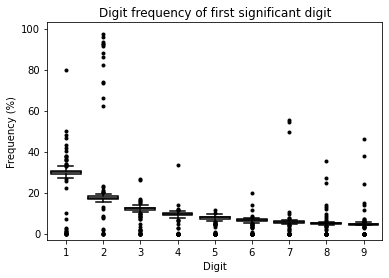

In [6]:
flierprops = dict(markerfacecolor='black', markersize=3, marker='o', linestyle='none')
ax = sns.boxplot(x = 'Digit', y = 'Frequency (percentage)', data = rearranged_digit_frequency, color = 'black', showfliers = True, flierprops=flierprops)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.set_xlabel("Digit")
ax.set_ylabel("Frequency (%)")
ax.set(ylim=(-3, 103))
ax.set(title='Digit frequency of first significant digit')
# plt.savefig('Figures/Figure1.png', dpi = 300)